# Practica 3. Regresión lineal con BGD
### Aprendizaje Máquina e Inteligencia Artificial
Francisco Pineda Hernández

In [572]:
# Librerías generales de uso
import pandas as pd
import numpy as np

## Batch Gradient Descent (BGD)

$$ w_i  = w_i - 2\alpha \sum_{i = 0}^{m - 1} (w_i x_{j, i} - y_i)x_{j, i} $$

In [573]:
def bgd(X, Y, W_inicial, alpha):
    W = []
    for i in range(X.shape[1]):
        aux2 = 0 
        for j in range(len(X)):
            #y_pred = np.dot(W_inicial, X[j])  
            aux2 += (W_inicial[i] * X[j, i] - float(Y[j])) * X[j, i]
            #aux2 += (y_pred - float(Y[j])) * X[j, i]
        aux = (W_inicial[i] - (2 * alpha * aux2))
        W.append(aux)
    return W

In [574]:
from sklearn.model_selection import train_test_split # Importamos el método para dividir el dataset


def aplicar_bgd(dataset, iteraciones, W, alpha, error_ideal=0.01):
    print("ESTE ES EL W ORIGINAL ", W)
    if len(W) != len(dataset.iloc[0]) - 1:
        print("Las dimensiones del vector W y del dataset no coinciden")
        return
    
    W_arreglo = []
    errores_arreglo = []
    error_actual = float('inf') 
    W_arreglo.append(W)
    indice_correcto = 0
    
    # Dividir el dataset
    columna_objetivo = list(dataset.columns)[-1]
    dataset_train, dataset_test = train_test_split(dataset, train_size=0.7, test_size=0.3, shuffle=True, random_state=0)
    X_train = dataset_train.drop(columns=[columna_objetivo]).values
    Y_train = dataset_train[columna_objetivo].values.reshape(-1, 1)
    
    for i in range(iteraciones):

        if error_actual <= error_ideal: # Identificar si ya se alcanzo un error deseado
            print(f"\n ========= ERROR ALCANZADO CON W ={W} :) ========= ")
            return W, W_arreglo, errores_arreglo

        print(f"\nITERACION {i}: W={W}, Alpha={alpha}")
        W = bgd(X_train, Y_train, W, alpha)
        suma_errores_iteracion = 0
        print(f"W nuevo = {W}")
        W_arreglo.append(W)

        # TEST's
        for j in range(len(dataset_test)):
            evaluacion = np.dot(dataset_test.iloc[j,:-1], W)
            error_test = abs(evaluacion - dataset_test[columna_objetivo].iloc[j])
            print(f"Test {i}: evaluacion = {evaluacion} | Y = {dataset_test[columna_objetivo].iloc[j]} ERROR=({error_test})")
            suma_errores_iteracion += error_test

        print(f"Suma total de errores = {suma_errores_iteracion}")

        if i == 0:
            error_actual = suma_errores_iteracion
            
        if suma_errores_iteracion < error_actual:
            error_actual = suma_errores_iteracion
            errores_arreglo.append(suma_errores_iteracion)
            indice_correcto += 1
        else:
            alpha /= 2
            W = W_arreglo[indice_correcto]
            #print(W_arreglo)
            print(f" ================================= Alpha disminuido a => {alpha}, W a usar = {W}")

    print(f" =========== FINALIZADO POR ITERACIONES, REGRESANDO W = {W} ===========")
    return W, W_arreglo, errores_arreglo

## Programa 1

In [575]:
# Lectura dataset precio de viviendas programa 1
casas = pd.read_csv('casas.csv')
casas

,Terreno (m2),Precio (MDP)
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99
5,255.0,0.59
6,594.0,1.37
7,625.0,1.44
8,708.0,1.63
9,468.0,1.08


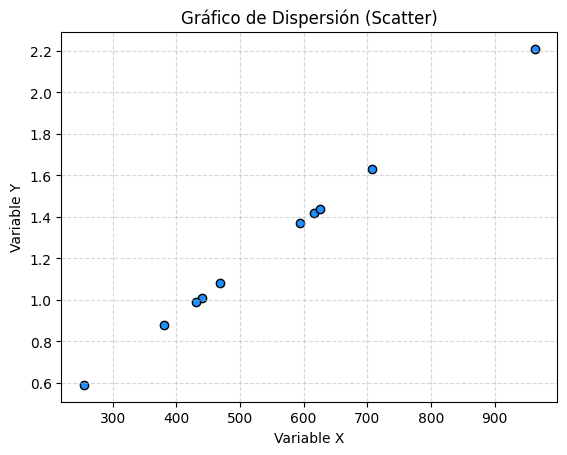

In [576]:
import matplotlib.pyplot as plt
# Graficar scatter
plt.scatter(casas['Terreno (m2)'], casas['Precio (MDP)'], color='dodgerblue', marker='o', edgecolor='black')

# Personalizar gráfico
plt.title('Gráfico de Dispersión (Scatter)')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [577]:
W_final_casas, W_arreglo_casas, errores_arreglo_casas = aplicar_bgd(casas, 1000, [0] * 1, 0.001)

ESTE ES EL W ORIGINAL  [0]

ITERACION 0: W=[0], Alpha=0.001
W nuevo = [11.634039999999999]
Test 0: evaluacion = 4432.56924 | Y = 0.88 ERROR=(4431.68924)
Test 0: evaluacion = 8236.900319999999 | Y = 1.63 ERROR=(8235.27032)
Test 0: evaluacion = 5014.271239999999 | Y = 0.99 ERROR=(5013.281239999999)
Suma total de errores = 17680.2408
 ================================= Alpha disminuido a => 0.0005, W a usar = [0]

ITERACION 1: W=[0], Alpha=0.0005
W nuevo = [5.817019999999999]
Test 1: evaluacion = 2216.28462 | Y = 0.88 ERROR=(2215.40462)
Test 1: evaluacion = 4118.450159999999 | Y = 1.63 ERROR=(4116.820159999999)
Test 1: evaluacion = 2507.1356199999996 | Y = 0.99 ERROR=(2506.14562)
Suma total de errores = 8838.370399999998

ITERACION 2: W=[5.817019999999999], Alpha=0.0005
W nuevo = [-14693.414413699998]
Test 2: evaluacion = -5598190.891619699 | Y = 0.88 ERROR=(5598191.771619699)
Test 2: evaluacion = -10402937.404899599 | Y = 1.63 ERROR=(10402939.0348996)
Test 2: evaluacion = -6332861.6123047

C:\Users\packo\AppData\Local\Temp\ipykernel_13380\2147096875.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  aux2 += (W_inicial[i] * X[j, i] - float(Y[j])) * X[j, i]


In [578]:
W_final_casas

[0.0023069054674830568]

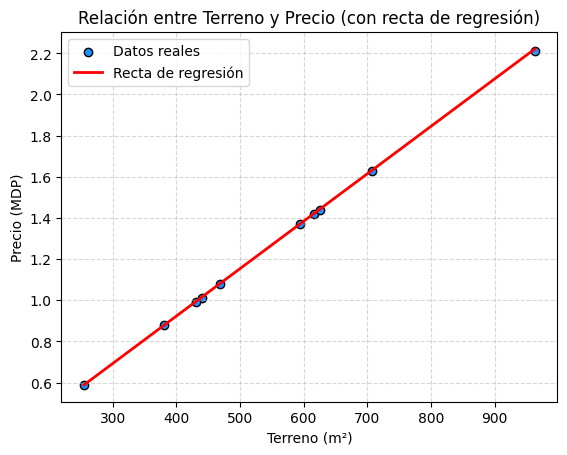

In [579]:

# Crear valores de X para la línea
x_vals = np.linspace(casas['Terreno (m2)'].min(), casas['Terreno (m2)'].max(), 100)
y_vals = W_final_casas[0] * x_vals  # Recta de regresión

# Graficar puntos reales
plt.scatter(casas['Terreno (m2)'], casas['Precio (MDP)'], 
            color='dodgerblue', marker='o', edgecolor='black', label='Datos reales')

# Graficar línea de regresión
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Recta de regresión')

# Personalizar gráfico
plt.title('Relación entre Terreno y Precio (con recta de regresión)')
plt.xlabel('Terreno (m²)')
plt.ylabel('Precio (MDP)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


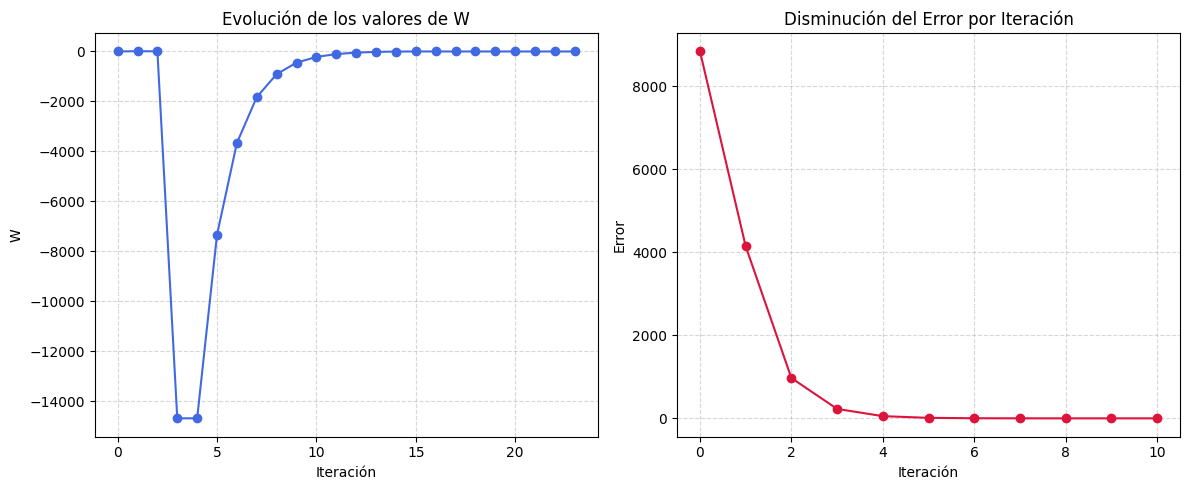

In [580]:

# Convertir W a numpy y obtener solo un componente si tiene varios
W_vals = np.array(W_arreglo_casas, dtype=float).flatten()

# Crear figura con 2 subplots uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico 1: evolución de W ---
axs[0].plot(range(len(W_vals)), W_vals, color='royalblue', marker='o')
axs[0].set_title('Evolución de los valores de W')
axs[0].set_xlabel('Iteración')
axs[0].set_ylabel('W')
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- Gráfico 2: evolución del error ---
axs[1].plot(range(len(errores_arreglo_casas)), errores_arreglo_casas, color='crimson', marker='o')
axs[1].set_title('Disminución del Error por Iteración')
axs[1].set_xlabel('Iteración')
axs[1].set_ylabel('Error')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [581]:
multivariable = pd.read_csv('Dataset_multivariable.csv')
multivariable

,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2
5,1.0,1.4,-27.0,32.0,18.7,26.1
6,1.0,1.6,-30.0,36.0,20.4,29.0
7,1.0,1.8,-33.0,40.0,22.1,31.9
8,1.0,2.0,-36.0,44.0,23.8,34.8
9,1.0,2.2,-39.0,48.0,25.5,37.7


In [582]:
W_final_multivariable, W_arreglo_multivariable, errores_arreglo_multivariable = aplicar_bgd(multivariable, 500, [0.0, 0.0, 0.0, 0.0, 0.0], 0.01)

ESTE ES EL W ORIGINAL  [0.0, 0.0, 0.0, 0.0, 0.0]

ITERACION 0: W=[0.0, 0.0, 0.0, 0.0, 0.0], Alpha=0.01
W nuevo = [3.422, 5.138800000000002, -97.614, 116.464, 66.94940000000001]
Test 0: evaluacion = 5004.37688 | Y = 17.4 ERROR=(4986.97688)
Test 0: evaluacion = 10245.61532 | Y = 34.8 ERROR=(10210.815320000002)
Test 0: evaluacion = 6751.45636 | Y = 23.2 ERROR=(6728.25636)
Suma total de errores = 21926.048560000003
 ================================= Alpha disminuido a => 0.005, W a usar = [0.0, 0.0, 0.0, 0.0, 0.0]

ITERACION 1: W=[0.0, 0.0, 0.0, 0.0, 0.0], Alpha=0.005
W nuevo = [1.711, 2.569400000000001, -48.807, 58.232, 33.474700000000006]
Test 1: evaluacion = 2502.18844 | Y = 17.4 ERROR=(2484.78844)
Test 1: evaluacion = 5122.80766 | Y = 34.8 ERROR=(5088.00766)
Test 1: evaluacion = 3375.72818 | Y = 23.2 ERROR=(3352.5281800000002)
Suma total de errores = 10925.32428

ITERACION 2: W=[1.711, 2.569400000000001, -48.807, 58.232, 33.474700000000006], Alpha=0.005
W nuevo = [3.30223, 4.7760007200

C:\Users\packo\AppData\Local\Temp\ipykernel_13380\2147096875.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  aux2 += (W_inicial[i] * X[j, i] - float(Y[j])) * X[j, i]


Test 399: evaluacion = 62.878612377686345 | Y = 17.4 ERROR=(45.478612377686346)
Test 399: evaluacion = 122.1824124501714 | Y = 34.8 ERROR=(87.3824124501714)
Test 399: evaluacion = 82.64654573518136 | Y = 23.2 ERROR=(59.44654573518136)
Suma total de errores = 192.30757056303912
 ================================= Alpha disminuido a => 8.121413879410078e-117, W a usar = [3.7189366896597407, 5.508404316001972, -0.9666668263905097, 0.8087777775674021, 1.5571613094741037]

ITERACION 400: W=[3.7189366896597407, 5.508404316001972, -0.9666668263905097, 0.8087777775674021, 1.5571613094741037], Alpha=8.121413879410078e-117
W nuevo = [3.7189366896597407, 5.508404316001972, -0.9666668263905097, 0.8087777775674021, 1.5571613094741037]
Test 400: evaluacion = 62.878612377686345 | Y = 17.4 ERROR=(45.478612377686346)
Test 400: evaluacion = 122.1824124501714 | Y = 34.8 ERROR=(87.3824124501714)
Test 400: evaluacion = 82.64654573518136 | Y = 23.2 ERROR=(59.44654573518136)
Suma total de errores = 192.307570

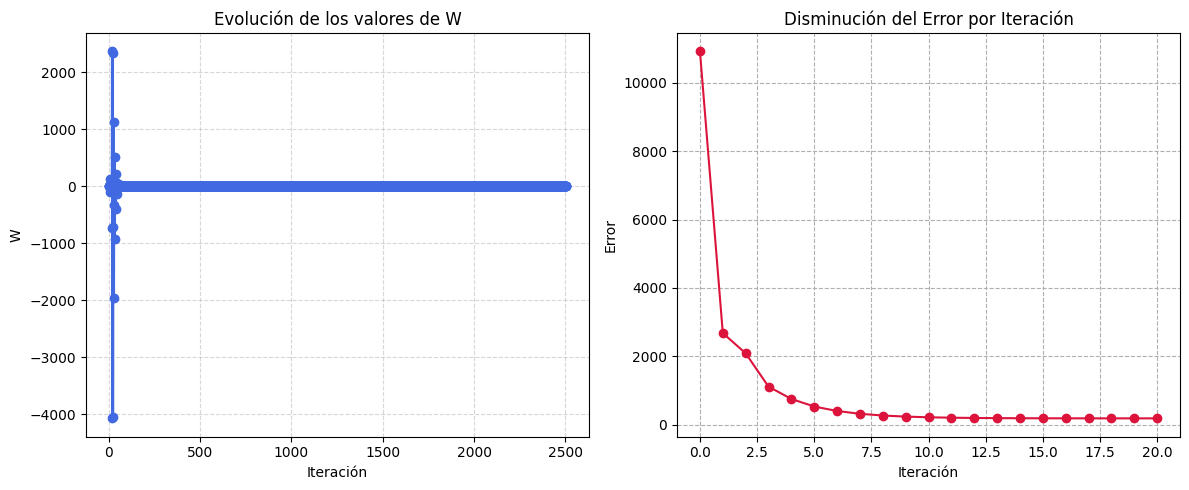

In [583]:

# Convertir W a numpy y obtener solo un componente si tiene varios
W_vals = np.array(W_arreglo_multivariable, dtype=float).flatten()

# Crear figura con 2 subplots uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico 1: evolución de W ---
axs[0].plot(range(len(W_vals)), W_vals, color='royalblue', marker='o')
axs[0].set_title('Evolución de los valores de W')
axs[0].set_xlabel('Iteración')
axs[0].set_ylabel('W')
axs[0].grid(True, linestyle='--', alpha=0.5)

# --- Gráfico 2: evolución del error ---
axs[1].plot(range(len(errores_arreglo_multivariable)), errores_arreglo_multivariable, color='crimson', marker='o')
axs[1].set_title('Disminución del Error por Iteración')
axs[1].set_xlabel('Iteración')
axs[1].set_ylabel('Error')
axs[1].grid(True, linestyle='--', alpha=1)

plt.tight_layout()
plt.show()